The first line ensures that we use floating-point division instead of the default integer divide. Line 3 establishes the figure and axis bindings using subplots. Keeping these separate is useful for very complicated plots. The arange function creates a Numpy array of numbers. Then, we compute the sine of this array and plot it in the figure we just created. The `-o` is shorthand for creating a plot with solid lines and with points marked with `o` symbols. Attaching the plot to the ax variable is the modern convention for Matplotlib that makes it clear where the plot is to be drawn. The next two lines set up the labels for the x-axis and y-axis, respectively, with the specified font size. 


Text(0, 0.5, 'Amplitude')

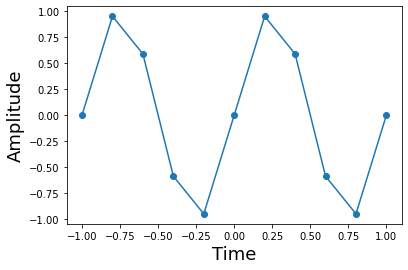

In [3]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
f = 1.0  # Hz, signal frequency
fs = 5.0 # Hz, sampling rate (ie. >= 2*f), change to take effect, default fs = 5.0 
t = np.arange(-1, 1+1/fs, 1/fs)    # sample interval, symmetric 
                                   # for convenience later
x = np.sin(2*np.pi*f*t)
ax.plot(t, x, 'o-')
ax.set_xlabel('Time', fontsize=18)
ax.set_ylabel('Amplitude', fontsize=18)

This
shows the sine function and its samples. Note that
sampling density is independent of the
local curvature of the function. It may
seem like it makes more sense to sample more densely
where the function is curviest, but the
sampling theorem has no such requirement.

On the third line below, we establish the limits of the axis using keyword
arguments. This enhances clarity
because the reader does not have to otherwise look up the positional
arguments instead.

Text(0, 0.5, 'Amplitude')

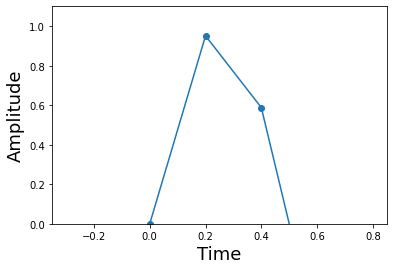

In [4]:
fig,ax = plt.subplots()
ax.plot(t,x,'o-')
ax.axis(xmin = 1/(4*f)-1/fs*3, 
        xmax = 1/(4*f)+1/fs*3,
        ymin = 0, 
        ymax = 1.1 )
ax.set_xlabel('Time',fontsize=18)
ax.set_ylabel('Amplitude',fontsize=18)


Code for constructing the piecewise linear approximation.  The hstack function packs smaller arrays horizontally into a larger array. The remainder of the code formats the respective inputs for Numpy's piecewise linear interpolating function.

In [5]:
interval = [] # piecewise domains
apprx = []  # line on domains
# build up points *evenly* inside of intervals
tp = np.hstack([np.linspace(t[i],t[i+1], 20, False) for i in range(len(t)-1)])
# construct arguments for piecewise
for i in range(len(t)-1):
   interval.append(np.logical_and(t[i] <= tp,tp < t[i+1]))
   apprx.append((x[i+1]-x[i])/(t[i+1]-t[i])*(tp[interval[-1]]-t[i]) + x[i])
x_hat = np.piecewise(tp, interval, apprx) # piecewise linear approximation


Line 2 uses fill_between to fill in  the convex region between the `x_hat` and the sin function with the given facecolor.  Because we want a vertical axis on both sides of the figure, we use the twinx function to create the duplicated axis. This shows the value of keeping separate variables for axes (i.e. ax1,ax2)

Text(0.5, 1.0, 'Errors with Piecewise Linear Interpolant')

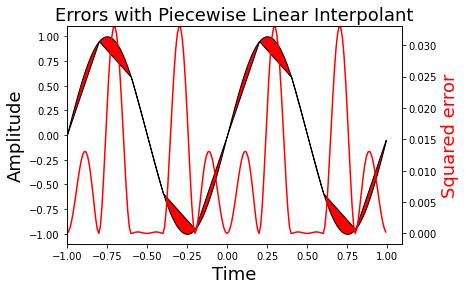

In [6]:
fig, ax1 = plt.subplots()
# fill in the difference between the interpolant and the sine
ax1.fill_between(tp, x_hat, np.sin(2*np.pi*f*tp), facecolor='red', edgecolor='black')
ax1.set_xlabel('Time',fontsize=18)
ax1.set_ylabel('Amplitude',fontsize=18)
ax2 = ax1.twinx() # create clone of ax1
sqe = (x_hat-np.sin(2*np.pi*f*tp))**2 #compute squared-error
ax2.plot(tp, sqe,'r')
ax2.axis(xmin=-1,ymax= sqe.max() )
ax2.set_ylabel('Squared error', color='r',fontsize=18)
ax1.set_title('Errors with Piecewise Linear Interpolant',fontsize=18)

Figure showing the squared error of the sine function and its corresponding linear interpolant. Note that the 
piecewise approximation is worse where the sine is curviest and better where the sine is approximately linear. This is indicated by the red-line whose axis is on the right side.

Code  that  shows that
you can draw multiple lines with a single plot function. The
only drawback is that you cannot later refer to the lines individually
using the legend function. Note the squared-error
here is imperceptible in this plot due to improved interpolant.


Text(0.5, 1.0, 'Sampling Rate=5.00 Hz')

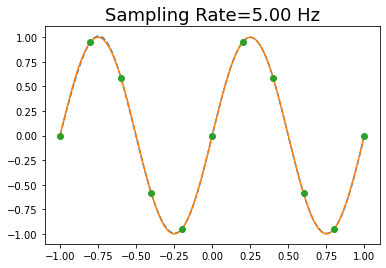

In [20]:
fig, ax = plt.subplots()
t = np.linspace(-1,1,100)      # redefine this here for convenience
ts = np.arange(-1,1+1/fs,1/fs) # sample points
num_coeffs = len(ts) 
sm = 0
for k in range(-num_coeffs, num_coeffs): # since function is real, need both sides
   sm += np.sin(2*np.pi*(k/fs))*np.sinc(k - fs*t)
ax.plot(t,sm,'--', t, np.sin(2*np.pi*t),ts, np.sin(2*np.pi*ts),'o')
ax.set_title('Sampling Rate=%3.2f Hz' % fs, fontsize=18 )

Note that on Line 8, we scale the y-axis maximum using the Numpy unary function (max()) attached to the `sqe` variable.

Text(0.5, 1.0, 'Errors with Whittaker Interpolant')

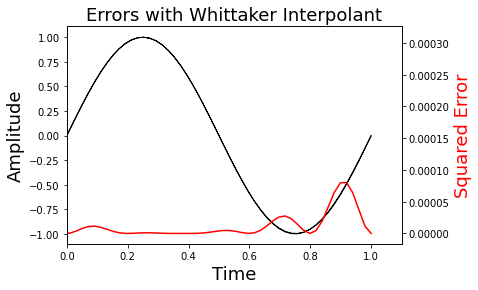

In [29]:
fig,ax1 = plt.subplots()
ax1.fill_between(t, sm, np.sin(2*np.pi*f*t), color='black')
ax1.set_ylabel('Amplitude',fontsize=18)
ax1.set_xlabel('Time',fontsize=18)
ax2 = ax1.twinx()
sqe = (sm - np.sin(2*np.pi*f*t))**2
ax2.plot(t, sqe,'r')
ax2.axis(xmin=0,ymax = sqe.max())
ax2.set_ylabel('Squared Error', color='r',fontsize=18)
ax1.set_title(r'Errors with Whittaker Interpolant',fontsize=18)

Listing introducing the `annotate` function that draws arrows with indicative text on the plot. The shrink key moves the tip and base of the arrow a small percentage away from the annotation point.

Text(-0.9, 0.5, 'no interference here')

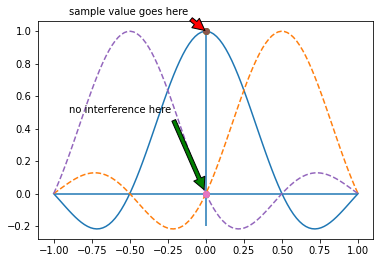

In [30]:
fig,ax = plt.subplots()
k = 0
fs = 2 # makes this plot easier to read
ax.plot(t,np.sinc(k - fs * t), 
        t,np.sinc(k+1 - fs * t),'--',k/fs,1,'o',(k)/fs,0,'o',
        t,np.sinc(k-1 - fs * t),'--',k/fs,1,'o',(-k)/fs,0,'o'
)
ax.hlines(0,-1,1)  # horizontal lines
ax.vlines(0,-.2,1) # vertical lines
ax.annotate('sample value goes here',
            xy=(0,1),          # arrowhead position
            xytext=(-1+.1,1.1),# text position
            arrowprops={'facecolor':'red',
                           'shrink':0.05},
            )
ax.annotate('no interference here',
            xy=(0,0),
            xytext=(-1+.1,0.5),
            arrowprops={'facecolor':'green','shrink':0.05},
            )

Neighboring interpolating functions do not mutually interfere at the sample points.

Line 4 uses Numpy broadcasting to create an implicit grid for evaluating the interpolating functions. The `.T` suffix is the transpose. The sum(axis=0) is the sum over the rows. 

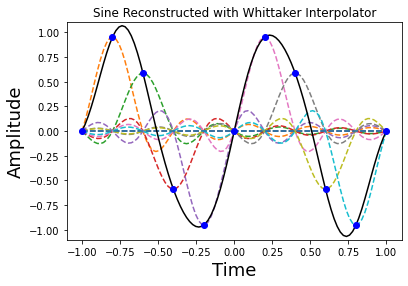

In [35]:
fs = 5.0 # sampling rate
k = np.array(sorted(set((t*fs).astype(int)))) # sorted coefficient list
fig,ax = plt.subplots()
ax.plot(t,(np.sin(2*np.pi*(k[:,None]/fs))*np.sinc(k[:,None]-fs*t)).T,'--', # individual whittaker functions
        t,(np.sin(2*np.pi*(k[:,None]/fs))*np.sinc(k[:,None]-fs*t)).sum(axis=0),'k-', # whittaker interpolant
     k/fs, np.sin(2*np.pi*k/fs),'ob')# samples
ax.set_xlabel('Time',fontsize=18)
ax.set_ylabel('Amplitude',fontsize=18)
ax.set_title('Sine Reconstructed with Whittaker Interpolator')
ax.axis((-1.1,1.1,-1.1,1.1));

Figure showing how the
sampled sine function is reconstructed (solid line) using individual Whittaker
interpolators (dashed lines). Note each of the sample points
sits on the peak of a sinc function.

Text(3.1, 0.5, '... and going...')

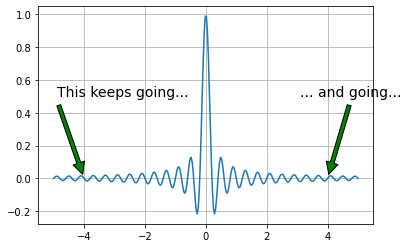

In [36]:
t = np.linspace(-5,5,300) # redefine this here for convenience
fig, ax = plt.subplots()

fs = 5.0     # sampling rate
ax.plot(t, np.sinc(fs * t))
ax.grid()  # put grid on axes
ax.annotate('This keeps going...',
            xy=(-4,0),
            xytext=(-5+.1,0.5),
            arrowprops={'facecolor':'green',
                           'shrink':0.05},
            fontsize=14)
ax.annotate('... and going...',
            xy=(4,0),
            xytext=(3+.1,0.5),
            arrowprops={'facecolor':'green',
                           'shrink':0.05},
            fontsize=14)

Notice in figure that the function extends to infinity in either direction. This basically means that the signals we can represent must also extend to infinity in either direction which then means that we have to sample forever to exactly reconstruct the signal! So, on the one hand, the sampling theorem says we only need a sparse density of samples, but this result says we need to sample forever.

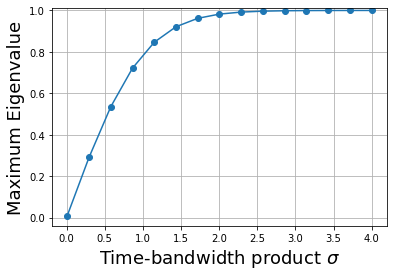

In [41]:
def kernel(x, sigma=1):
    'convenient function to compute kernel of eigenvalue problem'
    x = np.asanyarray(x)           # ensure x is array
    y = np.pi*np.where(x == 0,1.0e-20, x)# avoid divide by zero
    return np.sin(sigma/2*y)/y

nstep = 100                # quick and dirty integral quantization
t = np.linspace(-1,1,nstep) # quantization of time
dt = np.diff(t)[0]          # differential step size
def eigv(sigma):
    return np.linalg.eigvalsh(kernel(t-t[:,None],sigma)).max() # compute max eigenvalue

sigma = np.linspace(0.01,4,15) # range of time-bandwidth products to consider

fig,ax = plt.subplots()
ax.plot(sigma, dt*np.array([eigv(i) for i in sigma]),'-o')
ax.set_xlabel('Time-bandwidth product $\sigma$',fontsize=18)
ax.set_ylabel('Maximum Eigenvalue',fontsize=18)
ax.axis(ymax=1.01)
ax.grid()

As shown in figure, the maximum eigenvalue
quickly ramps up to almost one.  The largest eigenvalue is the
fraction of the energy contained in the  interval $[-1,1]$.
Thus, this means that for $\sigma \gg 3$, $\psi_0(t)$ is the
eigenfunction that is most concentrated in that interval. Now, let's
look at this eigenfunction under those conditions shown.


Text(0.5, 1.0, 'Eigenvalue=0.9990;$\\sigma$=3.00')

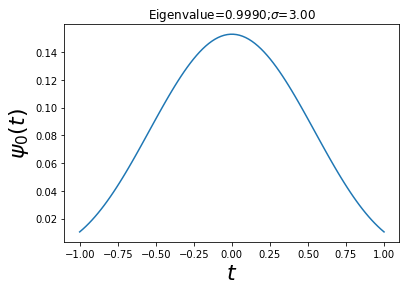

In [44]:
sigma = 3  # time-bandwidth product
w,v = np.linalg.eigh(kernel(t-t[:,None],sigma)) # eigen-system
maxv = v[:, w.argmax()]               # eigenfunction for max eigenvalue
fig,ax = plt.subplots()
ax.plot(t, maxv)
ax.set_xlabel('$t$',fontsize=22)
ax.set_ylabel('$\psi_0(t)$',fontsize=22)
ax.set_title('Eigenvalue=%3.4f;$\sigma$=%3.2f'%(w.max()*dt,sigma))

Text(0.5, 1.0, '$\\sigma=5$')

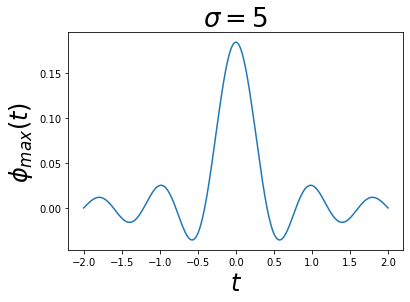

In [50]:
def kernel_tau(x,W=1):
    'convenient function to compute kernel of eigenvalue problem'
    x = np.asanyarray(x)
    y = np.pi*np.where(x == 0,1.0e-20, x) # avoid divide by zero
    return np.sin(2*W*y)/y

nstep = 300                   # quick and dirty integral quantization
t = np.linspace(-1,1,nstep)    # quantization of time
tt = np.linspace(-2,2,nstep)   # extend interval
sigma = 5
W = sigma/2./2./t.max()
w,v = np.linalg.eig(kernel_tau(t-tt[:,None],W)) # compute e-vectors/e-values
maxv = v[:,w.real.argmax()].real      # take real part

fig,ax = plt.subplots()
ax.plot(tt,maxv/np.sign(maxv[nstep//2])) # normalize for orientation 
ax.set_xlabel('$t$',fontsize=24)
ax.set_ylabel(r'$\phi_{max}(t)$',fontsize=24)
ax.set_title('$\sigma=%d$'%(2*W*2*t.max()),fontsize=26)

Figure looks suspicously like the sinc function. In fact, in the
limit as $\sigma \rightarrow \infty$, the  eigenfunctions devolve into
time-shifted versions of the sinc function. These are the same
functions used in the Whittaker interpolant. Now we have a way to
justify the interpolant by appealing to large $\sigma$ values.
